<a href="https://colab.research.google.com/github/Vigneshthanga/MachineLearning-CMPE257/blob/master/PoliticalBias_FinalExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mounting Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/MLSpring2020/"
base_dir = root_dir + 'the_expendables_AirQuality_Traffic'

Mounted at /content/gdrive


## Library imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Path for Liar Liar Dataset

In [0]:
liarFilepath = base_dir + '/Alternus_vera/liar_dataset/Liardataset.csv'
df = pd.read_csv(liarFilepath, encoding= 'unicode_escape') 

In [0]:
df.head(3)

json        class  ... pants_on_fire_counts          context
0   2635.json        FALSE  ...                  0.0         a mailer
1  10540.json    half-true  ...                  0.0  a floor speech.
2    324.json  mostly-true  ...                  9.0           Denver

[3 rows x 14 columns]

In [0]:
df.shape

(12791, 14)

## Split of class labels in Liar Liar Dataset

In [0]:
df['class'].value_counts()

half-true      2627
FALSE          2507
mostly-true    2454
barely-true    2103
TRUE           2053
pants-fire     1047
Name: class, dtype: int64

## Feature columns that are related to Party Affliation

In [0]:
feature_cols = ['barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts']

In [0]:
df1=df[['statement', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'party_affiliation', 'class']]

In [0]:
df1.head(4)

statement  ...        class
0  Says the Annies List political group supports ...  ...        FALSE
1  When did the decline of coal start? It started...  ...    half-true
2  Hillary Clinton agrees with John McCain "by vo...  ...  mostly-true
3  Health care reform legislation is likely to ma...  ...        FALSE

[4 rows x 8 columns]

In [0]:
df1 = df1.dropna()

In [0]:
df1.shape

(12789, 8)

In [0]:
X = df1[feature_cols]
y = df1[['party_affiliation']]

In [0]:
X.head(2)

barely_true_counts  false_counts  ...  mostly_true_counts  pants_on_fire_counts
0                 0.0           1.0  ...                 0.0                   0.0
1                 0.0           0.0  ...                 1.0                   0.0

[2 rows x 5 columns]

In [0]:
y.head(3)

party_affiliation
0        republican
1          democrat
2          democrat

## Building Decision Tree model for calculating the Feature importance. This can be derived from the gini Index value of the corresponding feature columns after tree construction

In [0]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [0]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [0]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7701329163408913


## Displaying Decsion Tree

In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.757759 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.757759 to fit



## Feature Importance Values

In [0]:
clf.feature_importances_

array([0.28085956, 0.16600071, 0.23836427, 0.15994525, 0.15483021])

## We can understand that values of barely_true_counts and half_true_counts are higher compared to the other features. Thus we will take those values individually and assess their contribution towards classification accuracy.

## Visualization using Diagonal Correlation Plot on the feature columns 

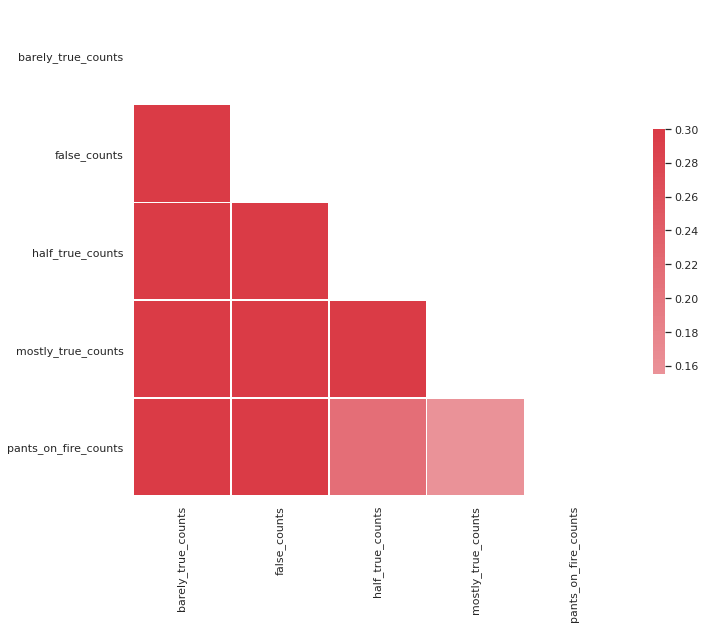

In [0]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")
rs = np.random.RandomState(33)
corr = df1.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [0]:
df_liar_pb = df1[['statement', 'party_affiliation', 'class', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts']]

## Computing Political Bias feature coumns based on the domain knowledge 

In [0]:
def politicalbiasLabel(x):
  if (x == 'republican'):
    return 0.9
  elif (x == 'democrat'):
    return 0.7
  elif (x == 'libertarian'):
    return 0.5
  elif (x == 'organization'):
    return 0.2
  elif (x == 'independent'):
    return 0.4
  elif (x == 'state-official'):
    return 0.35
  else:
    return 0.1

In [0]:
df_liar_pb['political_bias'] = df_liar_pb.party_affiliation.apply(politicalbiasLabel)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
df1['political_bias'] = df1.party_affiliation.apply(politicalbiasLabel)

In [0]:
df_liar_pb.head(3)

statement  ... political_bias
0  Says the Annies List political group supports ...  ...            0.9
1  When did the decline of coal start? It started...  ...            0.7
2  Hillary Clinton agrees with John McCain "by vo...  ...            0.7

[3 rows x 9 columns]

## Universal Label encoder - encoder which is applicable for both the fake and true news. 

In [0]:
from sklearn import preprocessing
classlabel_encoder = preprocessing.LabelEncoder()
classlabel_encoder.fit(df_liar_pb['class'])

LabelEncoder()

In [0]:
classlabel_encoder.classes_

array(['FALSE', 'TRUE', 'barely-true', 'half-true', 'mostly-true',
       'pants-fire'], dtype=object)

In [0]:
classEncoded = classlabel_encoder.transform(df_liar_pb['class'])

In [0]:
classEncoded

array([0, 3, 4, ..., 1, 0, 2])

In [0]:
df_liar_pb['class'] = classEncoded

In [0]:
df_liar_pb.head(3)

statement  ... political_bias
0  Says the Annies List political group supports ...  ...            0.9
1  When did the decline of coal start? It started...  ...            0.7
2  Hillary Clinton agrees with John McCain "by vo...  ...            0.7

[3 rows x 9 columns]

In [0]:
df_liar_pb1= df_liar_pb[['political_bias','class']]

In [0]:
df_liar_pb1.head(10)

political_bias  class
0             0.9      0
1             0.7      3
2             0.7      4
3             0.1      0
4             0.7      3
5             0.9      1
6             0.9      2
7             0.7      3
8             0.2      3
9             0.9      4

## Model Performance with only Political Bias feature (no amalgamation, no distiallation)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df_liar_pb1['political_bias'], df_liar_pb1['class'], test_size=0.20, random_state=42)

In [0]:
X_test.shape

(2558,)

In [0]:
xtrain = np.asmatrix(X_train)
xtest = np.asmatrix(X_test)
xtrain.shape
xtest.shape

(1, 2558)

In [0]:
xtrain = xtrain.reshape(-1,1)
xtest = xtest.reshape(-1,1)

In [0]:
def train_rf_model(xtrain, y_train):
  clf = RandomForestClassifier(n_jobs=2, random_state=0)
  clf.fit(xtrain, y_train)
  return clf

In [0]:
clf = train_rf_model(xtrain, y_train)

In [0]:
ypred = clf.predict(xtest)

In [0]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [0]:
rf_acc = accuracy_score(y_test, ypred)
rf_f1 = f1_score(y_test, ypred, average='weighted')

In [0]:
rf_acc

0.22283033620015638

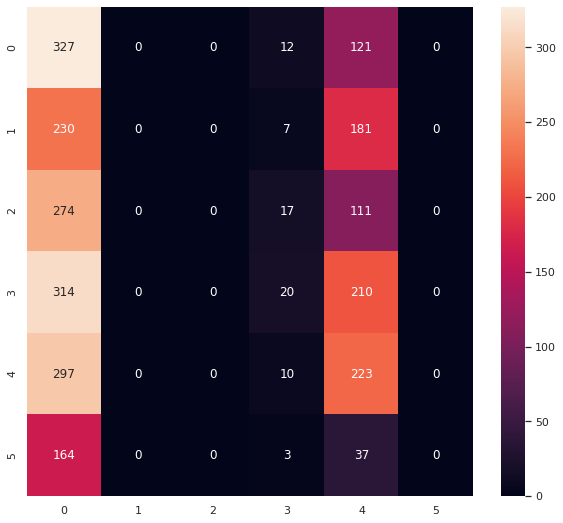

In [0]:
conf_mat=confusion_matrix(y_test,ypred)
#plot the con mat
class_labels=[0,1,2,3,4,5]
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(class_labels)
ax.set_yticklabels(class_labels)
plt.show()

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.20      0.71      0.32       460
           1       0.00      0.00      0.00       418
           2       0.00      0.00      0.00       402
           3       0.29      0.04      0.07       544
           4       0.25      0.42      0.32       530
           5       0.00      0.00      0.00       204

    accuracy                           0.22      2558
   macro avg       0.12      0.19      0.12      2558
weighted avg       0.15      0.22      0.14      2558



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model Performance with Political Bias feature and half_true_counts (no amalgamation, no distiallation)

In [0]:
df_liar_pb2 = df_liar_pb[['half_true_counts','political_bias','class']]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df_liar_pb2[['political_bias', 'half_true_counts']], df_liar_pb2['class'], test_size=0.20, random_state=42)

In [0]:
clf = train_rf_model(xtrain, y_train)
ypred = clf.predict(xtest)

In [0]:
rf_acc_2 = accuracy_score(y_test, ypred)
rf_f1_2 = f1_score(y_test, ypred, average='weighted')

In [0]:
rf_acc_2

0.22283033620015638

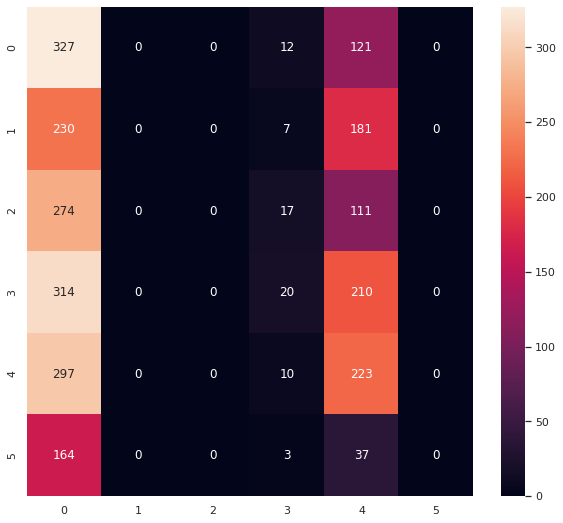

In [0]:
conf_mat=confusion_matrix(y_test,ypred)
#plot the con mat
class_labels=[0,1,2,3,4,5]
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(class_labels)
ax.set_yticklabels(class_labels)
plt.show()

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.20      0.71      0.32       460
           1       0.00      0.00      0.00       418
           2       0.00      0.00      0.00       402
           3       0.29      0.04      0.07       544
           4       0.25      0.42      0.32       530
           5       0.00      0.00      0.00       204

    accuracy                           0.22      2558
   macro avg       0.12      0.19      0.12      2558
weighted avg       0.15      0.22      0.14      2558



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model Performance with Political Bias, half_true_counts and barely_true_counts (no amalgamation, no distiallation)

In [0]:
df_liar_pb3 = df_liar_pb[['half_true_counts','barely_true_counts', 'political_bias','class']]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df_liar_pb3[['political_bias', 'half_true_counts', 'barely_true_counts']], df_liar_pb3['class'], test_size=0.20, random_state=42)

In [0]:
clf = train_rf_model(xtrain, y_train)
ypred = clf.predict(xtest)

In [0]:
rf_acc_3 = accuracy_score(y_test, ypred)
rf_f1_3 = f1_score(y_test, ypred, average='weighted')

In [0]:
rf_f1_3

0.1362008297506286

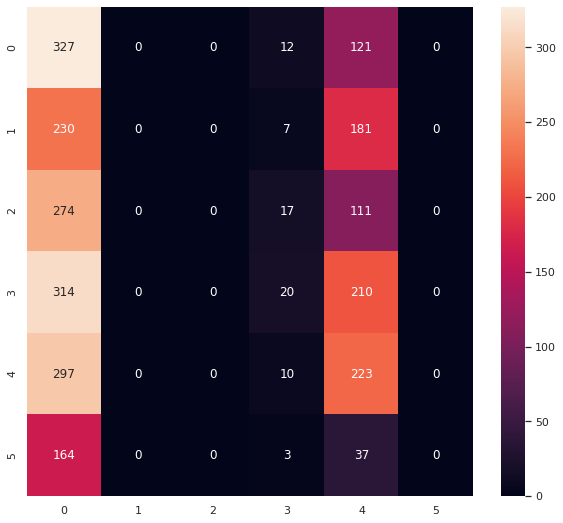

In [0]:
conf_mat=confusion_matrix(y_test,ypred)
#plot the con mat
class_labels=[0,1,2,3,4,5]
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(class_labels)
ax.set_yticklabels(class_labels)
plt.show()

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.20      0.71      0.32       460
           1       0.00      0.00      0.00       418
           2       0.00      0.00      0.00       402
           3       0.29      0.04      0.07       544
           4       0.25      0.42      0.32       530
           5       0.00      0.00      0.00       204

    accuracy                           0.22      2558
   macro avg       0.12      0.19      0.12      2558
weighted avg       0.15      0.22      0.14      2558



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Comparision of Model Performances on above experiments:


1.   Model is performing poorly with only Political Bias considered with no distillation and no amalgamation
2.   There is no clear improvement upon augmentation. The new feature added based on gini Index, didn't help much. 
3. The maximum accuracy we could achieve is 22 percent and it is poor than random guess



## Visualization

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [0]:
def Plot(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

##Preprocessing

In [0]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
from nltk.stem import WordNetLemmatizer 
def lemmatization(x):
  lemmatizer = WordNetLemmatizer() 
  text = lemmatizer.lemmatize(x)
  return text

In [0]:
import re
def removenumbers(x):
  text = re.sub(r'\d+', '', x)
  return text

In [0]:
def removespecialchars(x):
  x = str(x)
  x = x.lower()
  regex = re.compile('[^ a-zA-Z]')
  return regex.sub('',x)

In [0]:
def removewhitespace(x):
  text = x.rstrip()
  text = text.lstrip()
  return text

In [0]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
from nltk.tokenize import word_tokenize
from spacy.lang.en.stop_words import STOP_WORDS
stop_words = STOP_WORDS
def removestopwords(x):
  tokens = word_tokenize(x)
  result = [i for i in tokens if not i in stop_words]
  return result

In [0]:
def preprocess_text(x):
  text = removenumbers(x)
  text = removespecialchars(text)
  text = removewhitespace(text)
  wordList = removestopwords(text)
  text = ' '.join(wordList)
  res = lemmatization(text)
  return res

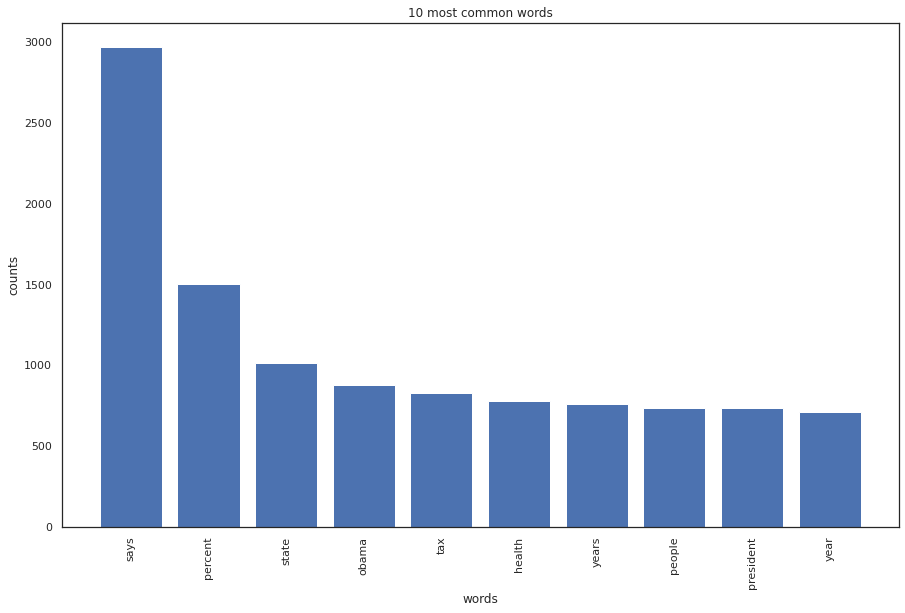

In [0]:
df1['clean_statement'] = df1['statement'].apply(preprocess_text)
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(df1['clean_statement'])
Plot(count_data, count_vectorizer)

## Class Labels Segreagation to two major Categories - All True and All False. Develop a model and use that model to extrapolate the labels of other 2 datsets

In [0]:
#All True
full_true = df1.loc[df1['class'] == 'TRUE']
most_true = df1.loc[df1['class'] == 'mostly-true']
half_true = df1.loc[df1['class'] == 'half-true']

#All False
barely_true = df1.loc[df1['class'] == 'barely-true']
full_false = df1.loc[df1['class'] == 'FALSE']
pants_fire = df1.loc[df1['class'] == 'pants-fire']

In [0]:
all_true = pd.concat([full_true, most_true, half_true])
all_false = pd.concat([barely_true,full_false,pants_fire])

In [0]:
all_false.shape

(5655, 10)

## Encoding party affiliation labels to discrete values based on domain understanding

1.   Assumption of Biased news are assigned higher values
2.   Assumption of unbiased news are assigned lower values



In [0]:
def biasLabel(x):
  if (x == 'republican'):
    return 0.9
  elif (x == 'democrat'):
    return 0.7
  elif (x == 'libertarian'):
    return 0.5
  else:
    return 0.5

In [0]:
def unbiasLabel(x):
  if (x == 'organization'):
    return 0.2
  elif (x == 'independent'):
    return 0.4
  elif (x == 'state-official'):
    return 0.35
  else:
    return 0.1

## Grouping related values in Party Affiliation. Thus reducing the feature dimensionality of Party Affiliation

In [0]:
bias_df = df1[(df1['party_affiliation'] == 'republican') | (df1['party_affiliation'] == 'democrat') | (df1['party_affiliation'] == 'libertarian') | (df1['party_affiliation'] == 'tea-party-member')]
unbias_df = df1[(df1['party_affiliation'] == 'none') | (df1['party_affiliation'] == 'organization') | (df1['party_affiliation'] == 'independent') | (df1['party_affiliation'] == 'newsmaker') | (df1['party_affiliation'] == 'journalist') | (df1['party_affiliation'] == 'columnist') | (df1['party_affiliation'] == 'activist') | (df1['party_affiliation'] == 'state-official')]

In [0]:
bias_df.party_affiliation.value_counts()

republican          5665
democrat            4137
libertarian           51
tea-party-member      10
Name: party_affiliation, dtype: int64

In [0]:
unbias_df.party_affiliation.value_counts()

none              2181
organization       264
independent        180
newsmaker           64
journalist          49
activist            45
columnist           44
state-official      24
Name: party_affiliation, dtype: int64

In [0]:
bias_df.head(3)

statement  ...                                    clean_statement
0  Says the Annies List political group supports ...  ...  says annies list political group supports thir...
1  When did the decline of coal start? It started...  ...  decline coal start started natural gas took st...
2  Hillary Clinton agrees with John McCain "by vo...  ...  hillary clinton agrees john mccain voting geor...

[3 rows x 10 columns]

## Applying Distillation on news text columns. The news text column will act as latent feature to compute the political bias feature in Kaggle Fake News Dataset and Kaggle News Category Dataset

In [0]:
import pandas as pd
from collections import Counter
import re
import numpy as np
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import f1_score, accuracy_score , recall_score , precision_score
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


## TFIDF vectorization

In [0]:
tfidf = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS,ngram_range=(1,2),max_df= 0.85, min_df= 0.01)

In [0]:
X_bias_text = bias_df.clean_statement.values
y = bias_df['political_bias']
X_bias_tfidf = tfidf.fit_transform (X_bias_text)

In [0]:
X_bias_tfidf.shape

(9863, 145)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

Using TensorFlow backend.


## Feed Forward Neural Network for Fake and Biased News 

In [0]:
def bias_model():
	# create model
	model = Sequential()
	model.add(Dense(145, input_dim=145, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [0]:
# evaluate model
estimator = KerasRegressor(build_fn=bias_model, epochs=10, batch_size=1000, verbose=1)
kfold = KFold(n_splits=2)
results = cross_val_score(estimator, X_bias_tfidf, y, cv=kfold)
print("Accuracy: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Epoch 1/10
4931/4931 [==============================] - 0s 73us/step - loss: 0.6156
Epoch 2/10
4931/4931 [==============================] - 0s 5us/step - loss: 0.5271
Epoch 3/10
4931/4931 [==============================] - 0s 6us/step - loss: 0.4381
Epoch 4/10
4931/4931 [==============================] - 0s 5us/step - loss: 0.3469
Epoch 5/10
4931/4931 [==============================] - 0s 5us/step - loss: 0.2564
Epoch 6/10
4931/4931 [==============================] - 0s 5us/step - loss: 0.1733
Epoch 7/10
4931/4931 [==============================] - 0s 5us/step - loss: 0.1069
Epoch 8/10
4931/4931 [==============================] - 0s 5us/step - loss: 0.0648
Epoch 9/10
4931/4931 [==============================] - 0s 5us/step - loss: 0.0478
Epoch 10/10
4932/4932 [==============================] - 0s 5us/step
Epoch 1/10
4932/4932 [==============================] - 0s 17us/step - loss: 0.6388
Epoch 2/10
4932/4932 [==============================] - 0s 5us/step - loss: 0.5578
Epoch 3/10
4932/

In [0]:
from sklearn import preprocessing
false_le = preprocessing.LabelEncoder()
false_le.fit(all_false['class'])
y = false_le.transform(all_false['class'])

In [0]:
fake_news = base_dir + '/Alternus_vera/fake.csv'
df_fake = pd.read_csv(fake_news) 

In [0]:
df_fake.head(2)

uuid  ord_in_thread  ... shares  type
0  6a175f46bcd24d39b3e962ad0f29936721db70db              0  ...      0  bias
1  2bdc29d12605ef9cf3f09f9875040a7113be5d5b              0  ...      0  bias

[2 rows x 20 columns]

In [0]:
df_fake.language.unique()

array(['english', 'ignore', 'german', 'french', 'spanish', 'russian',
       'greek', 'finnish', 'portuguese', 'arabic', 'dutch', 'italian',
       'turkish', 'norwegian', 'chinese', 'polish'], dtype=object)

In [0]:
df_fake = df_fake[df_fake['language'] == 'english']

In [0]:
df_fake = df_fake.dropna()

## Apply Preprocessing on Fake News dataset

In [0]:
df_fake['clean_title'] = df_fake.apply(lambda row: preprocess_text(str(row['title'])), axis=1)
df_fake.head(3)

uuid  ...                                        clean_title
0  6a175f46bcd24d39b3e962ad0f29936721db70db  ...        muslims busted stole millions govt benefits
1  2bdc29d12605ef9cf3f09f9875040a7113be5d5b  ...         attorney general loretta lynch plead fifth
2  c70e149fdd53de5e61c29281100b9de0ed268bc3  ...  breaking weiner cooperating fbi hillary email ...

[3 rows x 21 columns]

## Visualization of fake news dataset. The top words indicate that the words are from Politics Domain

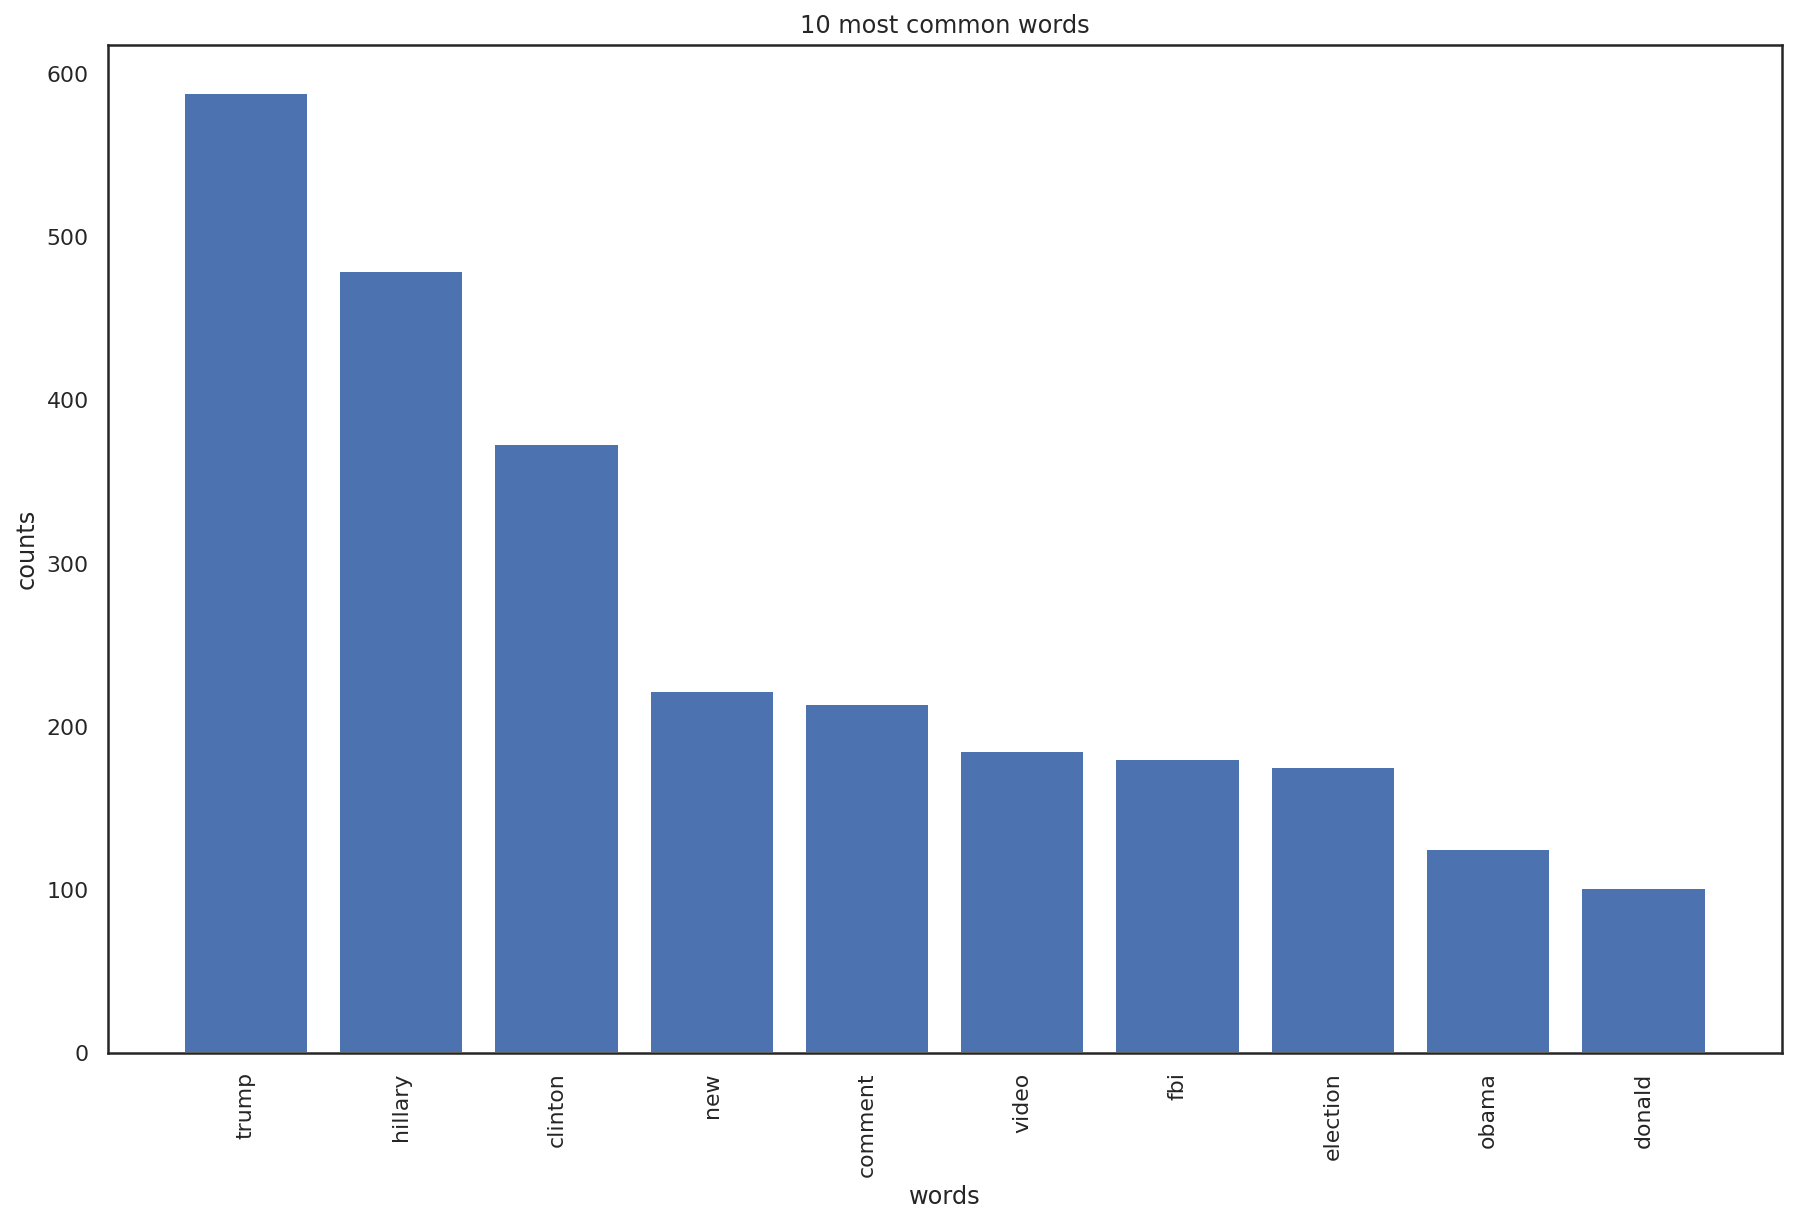

In [0]:
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(df_fake['clean_title'])
Plot(count_data, count_vectorizer)

## Apply Random Forest Classifier for label re-classification

In [0]:
rfmodel_false = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
False_text = all_false.clean_statement.values

In [0]:
tfidf = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS,ngram_range=(1,2),max_df= 0.85, min_df= 0.01)
False_features_tfidf = tfidf.fit_transform (False_text)

In [0]:
rfmodel_false.fit(False_features_tfidf, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
fake_text = df_fake.clean_title.values
fake_features_tfidf = tfidf.fit_transform (fake_text)
rfmodel_false.fit(False_features_tfidf, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
A=fake_features_tfidf.toarray()

In [0]:
A = np.pad(A, ((0,0),(0,85)), mode='constant')
y_pred= rfmodel_false.predict(A)
df_fake['textlabel'] = false_le.inverse_transform(y_pred)

In [0]:
X_fake_text = df_fake.clean_title.values
X_fake_tfidf = tfidf.fit_transform(X_fake_text)

In [0]:
X_fake_tfidf.shape

(4375, 48)

In [0]:
A = X_fake_tfidf.toarray()
X_fake_tfidf = np.pad(A, ((0,0),(0,97)), mode='constant')

In [0]:
X_bias_text = bias_df.clean_statement.values
y = bias_df['political_bias']
X_bias_tfidf = tfidf.fit_transform (X_bias_text)

## Train the neural Network model to compute Political Bias Feature

In [0]:
estimator.fit(X_bias_tfidf, y)

Epoch 1/10
9863/9863 [==============================] - 0s 11us/step - loss: 0.6056
Epoch 2/10
9863/9863 [==============================] - 0s 4us/step - loss: 0.4280
Epoch 3/10
9863/9863 [==============================] - 0s 5us/step - loss: 0.2478
Epoch 4/10
9863/9863 [==============================] - 0s 4us/step - loss: 0.1036
Epoch 5/10
9863/9863 [==============================] - 0s 4us/step - loss: 0.0488
Epoch 6/10
9863/9863 [==============================] - 0s 4us/step - loss: 0.0480
Epoch 7/10
9863/9863 [==============================] - 0s 7us/step - loss: 0.0410
Epoch 8/10
9863/9863 [==============================] - 0s 7us/step - loss: 0.0361
Epoch 9/10
9863/9863 [==============================] - 0s 4us/step - loss: 0.0338
Epoch 10/10
9863/9863 [==============================] - 0s 4us/step - loss: 0.0313


In [0]:
y_fake_pred = estimator.predict(X_fake_tfidf)

4375/4375 [==============================] - 0s 4us/step


In [0]:
X_unbias_text = unbias_df.clean_statement.values
y_unbias = unbias_df['political_bias']
X_unbias_tfidf = tfidf.fit_transform (X_unbias_text)

In [0]:
X_unbias_tfidf.shape

(2851, 136)

## Feed Forward Neural Network model for True and Unbiased News

In [0]:
def unbias_model():
	# create model
	model = Sequential()
	model.add(Dense(136, input_dim=136, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_absolute_error', optimizer='adam')
	return model

In [0]:
unbias_estimator = KerasRegressor(build_fn=unbias_model, epochs=10, batch_size=64, verbose=1)
kfold = KFold(n_splits=2)
results = cross_val_score(unbias_estimator, X_unbias_tfidf, y_unbias, cv=kfold)
print("Accuracy: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Epoch 1/10
1425/1425 [==============================] - 0s 101us/step - loss: 0.0673
Epoch 2/10
1425/1425 [==============================] - 0s 55us/step - loss: 0.0439
Epoch 3/10
1425/1425 [==============================] - 0s 56us/step - loss: 0.0381
Epoch 4/10
1425/1425 [==============================] - 0s 52us/step - loss: 0.0355
Epoch 5/10
1425/1425 [==============================] - 0s 55us/step - loss: 0.0340
Epoch 6/10
1425/1425 [==============================] - 0s 50us/step - loss: 0.0331
Epoch 7/10
1425/1425 [==============================] - 0s 50us/step - loss: 0.0328
Epoch 8/10
1425/1425 [==============================] - 0s 60us/step - loss: 0.0326
Epoch 9/10
1425/1425 [==============================] - 0s 52us/step - loss: 0.0320
Epoch 10/10
1426/1426 [==============================] - 0s 33us/step
Epoch 1/10
1426/1426 [==============================] - 0s 92us/step - loss: 0.0726
Epoch 2/10
1426/1426 [==============================] - 0s 51us/step - loss: 0.0407
Epoch

In [0]:
newscategoryFilepath = base_dir + '/Alternus_vera/News_Category.csv'
df_newscat = pd.read_csv(newscategoryFilepath)
df_newscat = df_newscat.loc[df_newscat['category'] == 'POLITICS']

## Build Random Forest model on the distilled data

In [0]:
df_newscat=df_newscat.dropna()

In [0]:
from sklearn import preprocessing
true_le = preprocessing.LabelEncoder()
true_le.fit(all_true['class'])
y = true_le.transform(all_true['class'])

In [0]:
rfmodel = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
X_title_text = all_true.clean_statement.values
X_title_tfidf = tfidf.fit_transform (X_title_text)

In [0]:
rfmodel.fit(X_title_tfidf, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Apply preprocessing on the News Category Dataset

In [0]:
df_newscat['clean_text'] = df_newscat.apply(lambda row: preprocess_text(str(row['short_description'])), axis=1)

## Visualization of fake news dataset. The top words indicate that the words are from Politics Domain

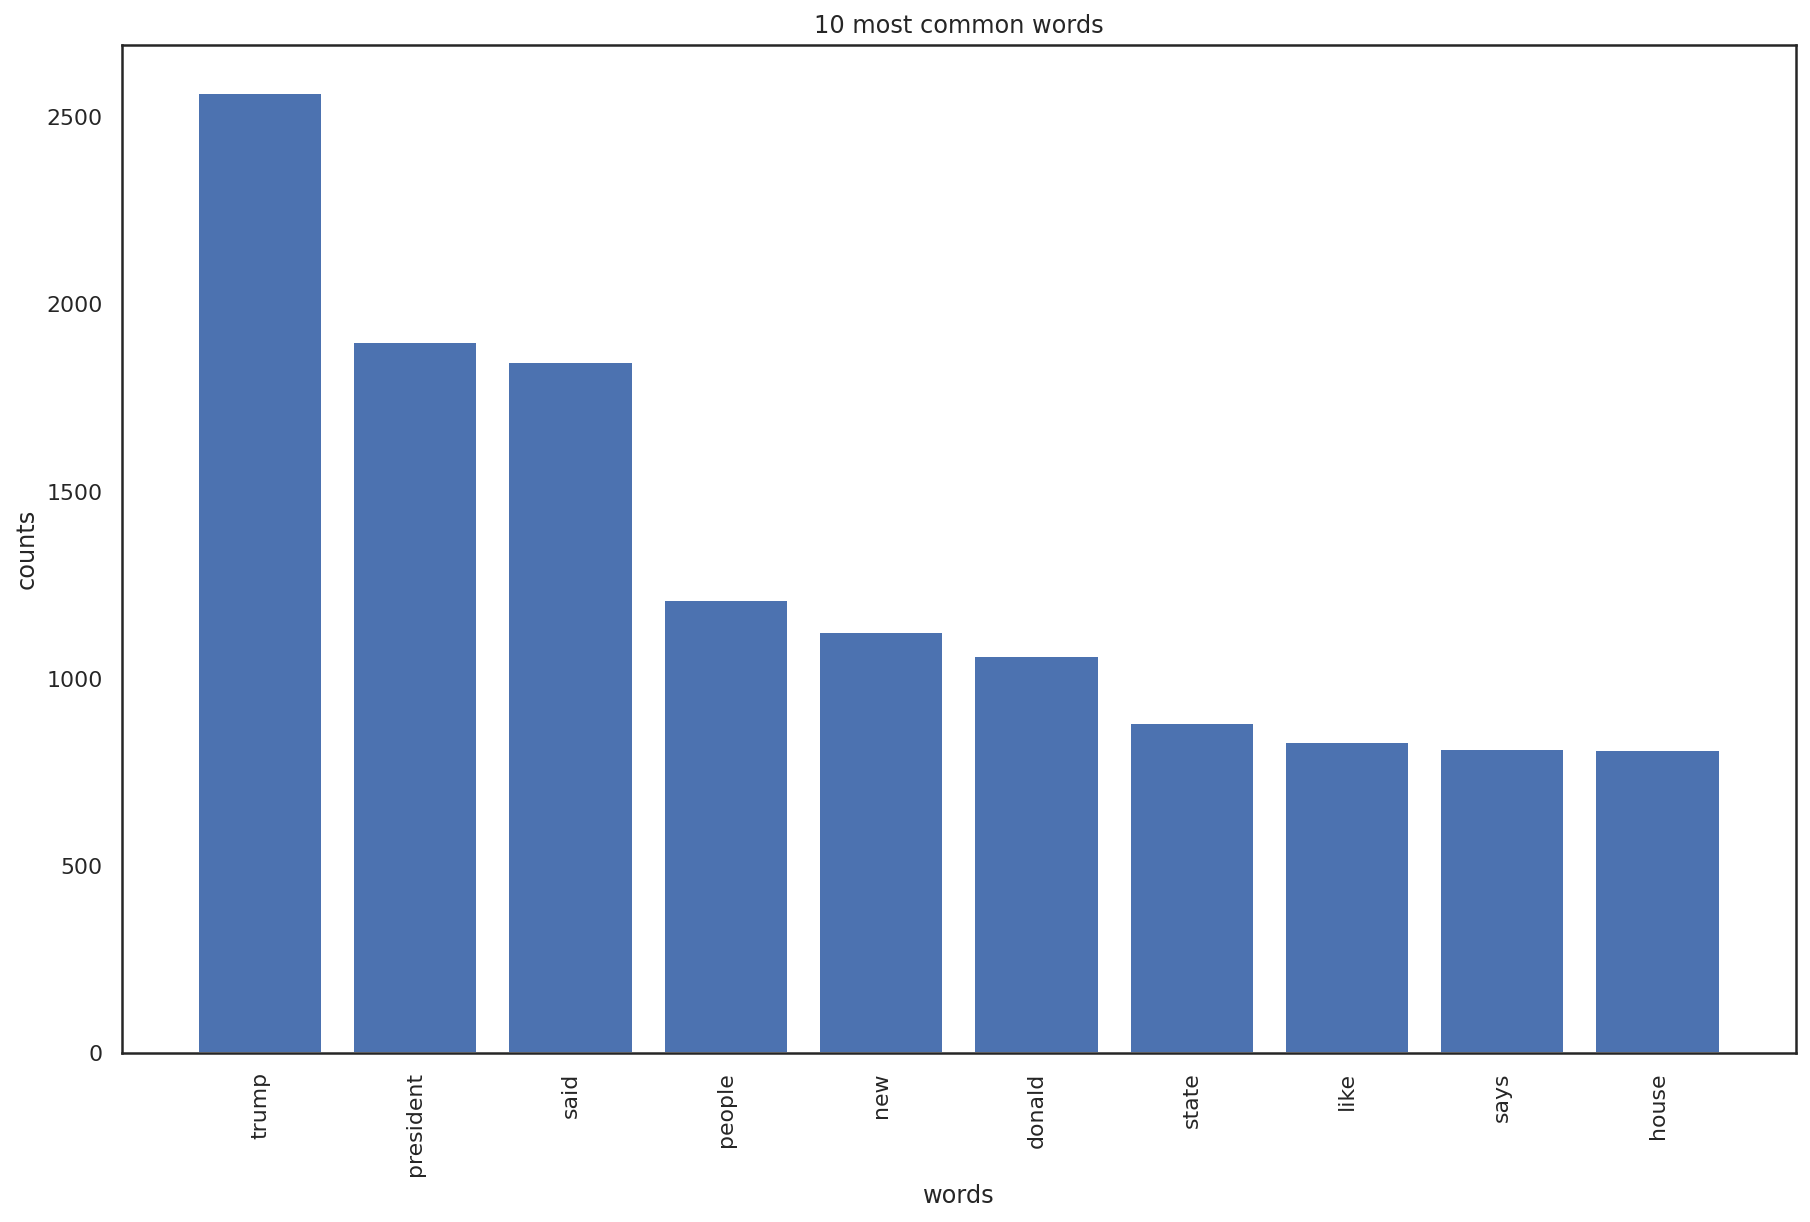

In [0]:
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(df_newscat['clean_text'])
Plot(count_data, count_vectorizer)

## Random Forest Classifier for label re-classification

In [0]:
X_news_text = df_newscat.clean_text.values
X_text_tfidf = tfidf.fit_transform(X_news_text)

In [0]:
X_text_tfidf.shape

(26913, 84)

In [0]:
A=X_text_tfidf.toarray()
A = np.pad(A, ((0,0),(0,66)), mode='constant')

In [0]:
y_pred = rfmodel.predict(A)

In [0]:
df_newscat['textlabel'] = true_le.inverse_transform(y_pred)

## Training the neural network model to compute the political bias feature.

In [0]:
unbias_estimator.fit(X_unbias_tfidf, y_unbias)

Epoch 1/10
2851/2851 [==============================] - 0s 75us/step - loss: 0.0594
Epoch 2/10
2851/2851 [==============================] - 0s 48us/step - loss: 0.0364
Epoch 3/10
2851/2851 [==============================] - 0s 55us/step - loss: 0.0333
Epoch 4/10
2851/2851 [==============================] - 0s 47us/step - loss: 0.0323
Epoch 5/10
2851/2851 [==============================] - 0s 48us/step - loss: 0.0318
Epoch 6/10
2851/2851 [==============================] - 0s 52us/step - loss: 0.0315
Epoch 7/10
2851/2851 [==============================] - 0s 49us/step - loss: 0.0312
Epoch 8/10
2851/2851 [==============================] - 0s 49us/step - loss: 0.0313
Epoch 9/10
2851/2851 [==============================] - 0s 52us/step - loss: 0.0309
Epoch 10/10
2851/2851 [==============================] - 0s 49us/step - loss: 0.0308


In [0]:
X_news_tfidf = tfidf.fit_transform(X_news_text)
A = X_news_tfidf.toarray()
X_news_tfidf = np.pad(A, ((0,0),(0,52)), mode='constant')

In [0]:
X_news_tfidf.shape

(26913, 136)

In [0]:
y_news_pred = unbias_estimator.predict(X_news_tfidf)

26913/26913 [==============================] - 0s 14us/step


In [0]:
df_newscat['political_bias'] = y_news_pred 
df_fake['political_bias'] = y_fake_pred

In [0]:
df_fake.head(3)

uuid  ...  political_bias
0  6a175f46bcd24d39b3e962ad0f29936721db70db  ...        0.413821
1  2bdc29d12605ef9cf3f09f9875040a7113be5d5b  ...        0.413821
2  c70e149fdd53de5e61c29281100b9de0ed268bc3  ...        0.948652

[3 rows x 23 columns]

## Amalgamation of three datasets

In [0]:
d1 = df1[['political_bias', 'class']]
d2 = df_newscat[['political_bias', 'textlabel']]
d3 = df_fake[['political_bias', 'textlabel']]

In [0]:
d1 = d1.values
d2 = d2.values
d3 = d3.values

## Use Numpy's Vstack to do row wise amalgamation

In [0]:
dat = np.vstack((d1,d2))
arr = np.vstack((dat, d3))

In [0]:
df_final = pd.DataFrame(arr, columns=['political_bias', 'class'])

In [0]:
df_final = df_final.sample(frac=1)

In [0]:
df_final['class'] = classlabel_encoder.transform(df_final['class'])

In [0]:
df_final.head(5)

political_bias  class
7233             0.1      2
29412       0.104775      3
40025       0.413821      0
43225       0.413821      0
24256      0.0918622      3

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df_final['political_bias'], df_final['class'], test_size=0.20, random_state=42)

In [0]:
xtrain = np.asmatrix(X_train)
xtest = np.asmatrix(X_test)
xtrain.shape
xtest.shape

(1, 8816)

In [0]:
xtrain = xtrain.reshape(-1,1)
xtest = xtest.reshape(-1,1)

## Building Random Forest model for news classification

In [0]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(xtrain, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
ypred = clf.predict(xtest)

In [0]:
rfscore = accuracy_score(y_test, ypred)
rff1 = f1_score(y_test, ypred, average='weighted')

In [0]:
rfscore

0.775975499092559

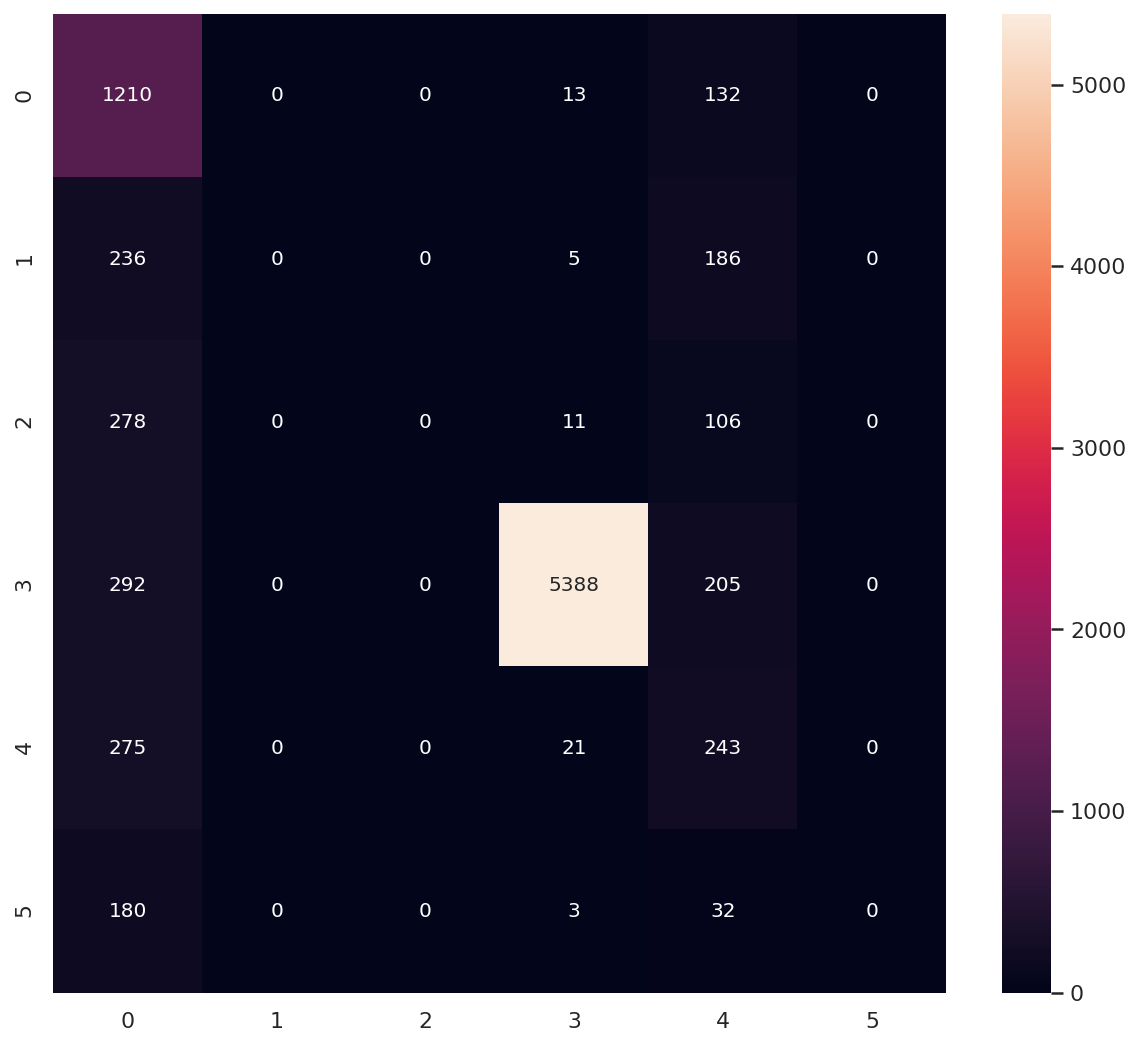

In [0]:
conf_mat=confusion_matrix(y_test,ypred)
#plot the con mat
class_labels=[0,1,2,3,4,5]
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(class_labels)
ax.set_yticklabels(class_labels)
plt.show()

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.49      0.89      0.63      1355
           1       0.00      0.00      0.00       427
           2       0.00      0.00      0.00       395
           3       0.99      0.92      0.95      5885
           4       0.27      0.45      0.34       539
           5       0.00      0.00      0.00       215

    accuracy                           0.78      8816
   macro avg       0.29      0.38      0.32      8816
weighted avg       0.75      0.78      0.75      8816



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Building XGBoost Model for news classification

In [0]:
from xgboost import XGBClassifier

In [0]:
model = XGBClassifier()
model.fit(xtrain, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
ypred = model.predict(xtest)

In [0]:
xgscore = accuracy_score(y_test, ypred)
xgf1 = f1_score(y_test, ypred, average='weighted')

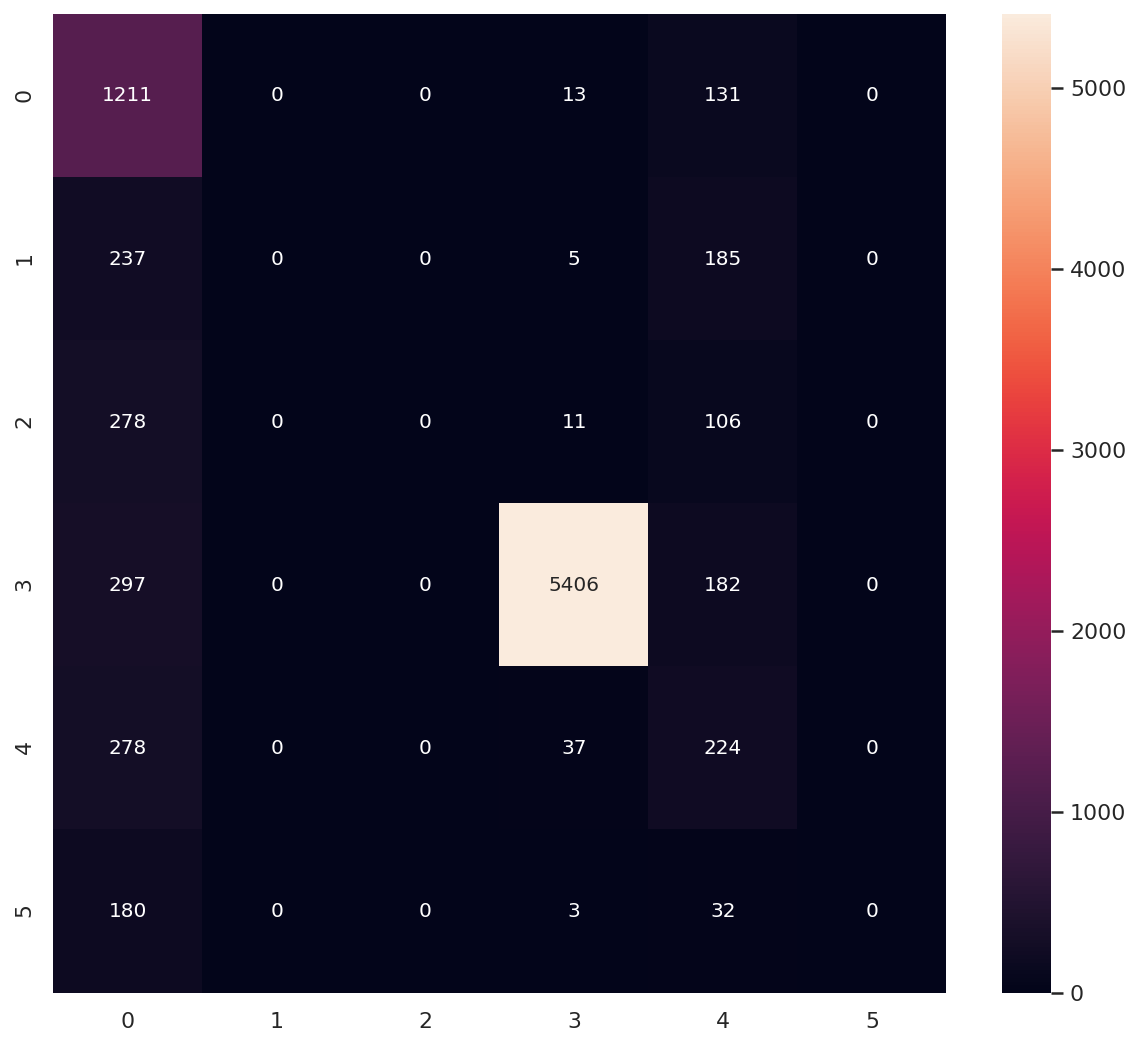

In [0]:
conf_mat=confusion_matrix(y_test,ypred)
#plot the con mat
class_labels=[0,1,2,3,4,5]
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(class_labels)
ax.set_yticklabels(class_labels)
plt.show()

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.49      0.89      0.63      1355
           1       0.00      0.00      0.00       427
           2       0.00      0.00      0.00       395
           3       0.99      0.92      0.95      5885
           4       0.26      0.42      0.32       539
           5       0.00      0.00      0.00       215

    accuracy                           0.78      8816
   macro avg       0.29      0.37      0.32      8816
weighted avg       0.75      0.78      0.75      8816



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
decTclf = DecisionTreeClassifier(random_state=0)

In [0]:
decTclf.fit(xtrain, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
ypred = decTclf.predict(xtest)
decscore = accuracy_score(y_test, ypred)

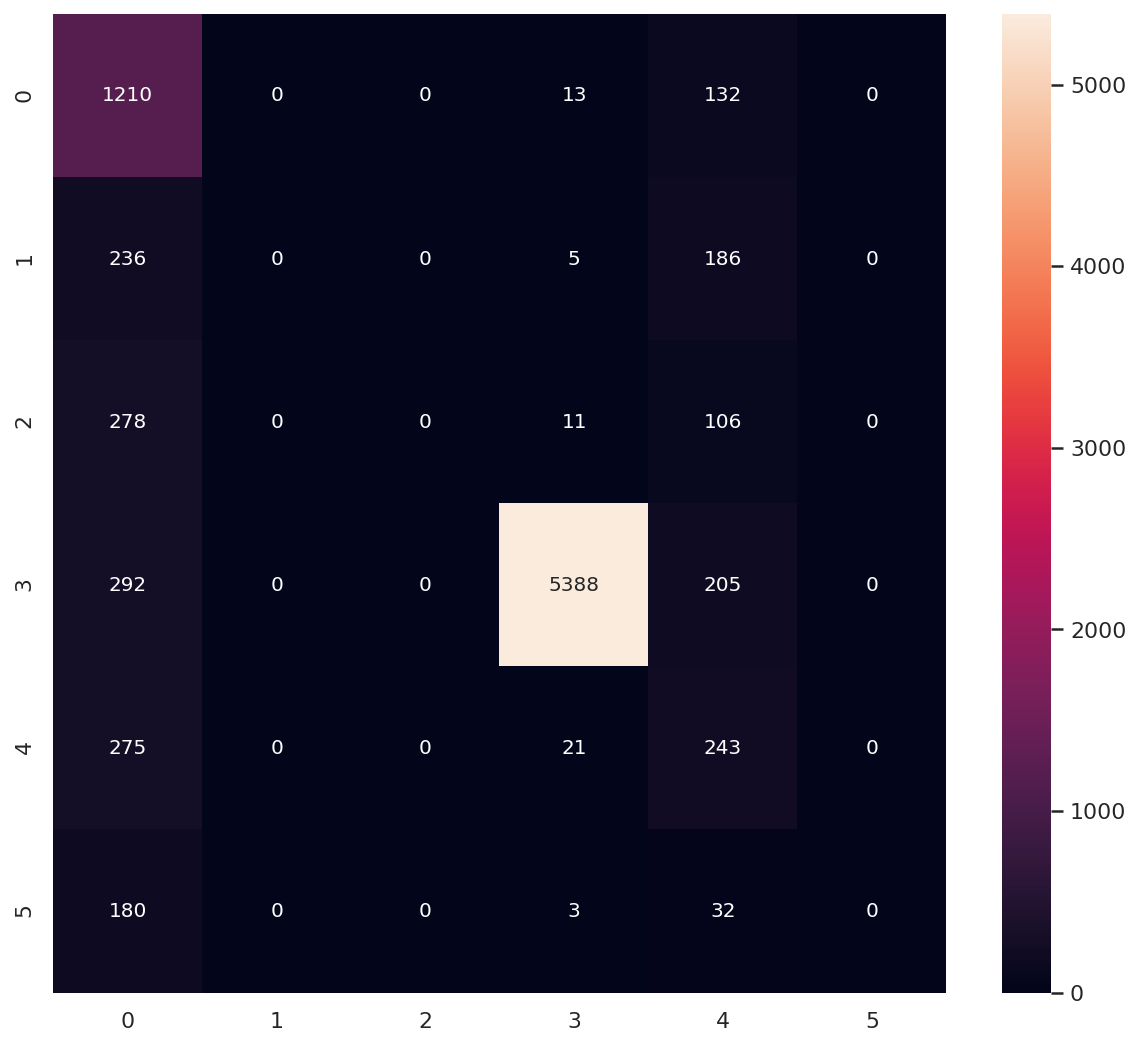

In [0]:
conf_mat=confusion_matrix(y_test,ypred)
#plot the con mat
class_labels=[0,1,2,3,4,5]
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(class_labels)
ax.set_yticklabels(class_labels)
plt.show()

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.49      0.89      0.63      1355
           1       0.00      0.00      0.00       427
           2       0.00      0.00      0.00       395
           3       0.99      0.92      0.95      5885
           4       0.27      0.45      0.34       539
           5       0.00      0.00      0.00       215

    accuracy                           0.78      8816
   macro avg       0.29      0.38      0.32      8816
weighted avg       0.75      0.78      0.75      8816



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Comparision among the models:
1. All three models are performing good. Their accuracies are more or less similar. 
2. XGBoost model is more sensitive towards fake news and it can detect correctly the fake news as fake news. So, XGBoost has slight edge over the other models.

## Compare with distillation and without distillation.


We can clearly see that the model is performing better with distillation and amalgamation
1. The accuracy before amalgamation and distillation was just 22 percent.
2. Whereas the accuracy after amalgamation and distiallation is 77 percent.

Thus, the methods of distiallations and amalgamations are important in Natural Language processing to make the ML models more robust and reliable


## Kaggle fake new dataset bs column balancing

## Problem : The fake news dataset has too many bs value in type column.
## Solution: 
1. In this colab we have took the fake new data and we applied label re-classification.
2. We need to build ML model based on the data we have in our hand - Liar Liar dataset.
3. Now this model will act as a baseline model for label reclassification on other datasets to make them more balanced. This can be applied to label column or a feature column as well.
4. Eg: We can develop a model using all the data other bs valued rows. Now use this model to re-classify the bs rows. 
5. This way all the bs rows are got re-assigned to a different value based on the news data.

## Conclusions on how can we improve multi-class classification on the liar liar dataset:

1. News Data cleaning and preprocessing is the foremost important thing
2. Identify important features based on domain knowlege
3. Identify important features based on Gini Index computation, PCA or any correlation analysis.
4. Derive those feature columns develop a model and check the accuracy.
5. To imporove the accuracy, apply amalgamation to enrich the dataset.
6. After amalgamtion apply distialltion on the datasets.
7. Use this latent features to compute the feature columns that are important for new classification.
8. Now do row wise amalgamation if these are in different dataframes.
9. Apply any classifier and check the accuracy.
10. These are steps to approach the multi-class classification problem in Liar Liar Dataset. 